In [2]:
import pandas as pd

# Load the uploaded Excel file
from google.colab import files
uploaded = files.upload()

# Assuming the file is named 'mortality_bank.xlsx'
mortality_bank_path = "mortality_bank.xlsx"
mortality_bank_df = pd.read_excel(mortality_bank_path)

# Rename columns to match content for clarity
mortality_bank_df.columns = mortality_bank_df.iloc[0]
mortality_bank_df = mortality_bank_df[1:]

# Define a mapping of columns to metrics for melting
metrics_mapping = {
    "1990 (All Age Deaths)": "All Age Deaths",
    "2010(All Age Deaths)": "All Age Deaths",
    "2019(All Age Deaths)": "All Age Deaths",
    "2020 (All Age Deaths)": "All Age Deaths",
    "2021 (All Age Deaths)": "All Age Deaths",
    "GDP_PERCAP_2010": "GDP per Capita",
    "GDP_PERCAP_2019": "GDP per Capita",
    "GDP_PERCAP_2020": "GDP per Capita",
    "GDP_PERCAP_2021": "GDP per Capita",
    "CHE_2020": "CHE",
    "CHE_2021": "CHE",
    "CHE_PERCAP_2010": "CHE per Capita",
    "CHE_PERCAP_2019": "CHE per Capita",
    "CHE_PERCAP_2020": "CHE per Capita",
    "CHE_PERCAP_2021": "CHE per Capita",
    "TOTAL_POP_2010": "Total Population",
    "TOTAL_POP_2019": "Total Population",
    "TOTAL_POP_2020": "Total Population",
    "TOTAL_POP_2021": "Total Population"
}

# Melt the dataframe to reshape it
melted_df = pd.melt(
    mortality_bank_df,
    id_vars=["location_name", "cause_name"],
    value_vars=list(metrics_mapping.keys()),
    var_name="Year_Metric",
    value_name="Value"
)

# Extract the year and metric type
melted_df["year"] = melted_df["Year_Metric"].str.extract(r'(\d{4})').astype(int)
melted_df["Metric"] = melted_df["Year_Metric"].map(metrics_mapping)

# Drop the original Year_Metric column as it's no longer needed
melted_df.drop(columns=["Year_Metric"], inplace=True)

# Rearrange columns for clarity
melted_df = melted_df[["location_name", "cause_name", "year", "Metric", "Value"]]

# Save the reshaped dataset to a CSV file for download
melted_df.to_csv("reshaped_mortality_data.csv", index=False)

# Provide download link
from google.colab import files
files.download("reshaped_mortality_data.csv")


Saving mortality_bank.xlsx to mortality_bank (1).xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
import pandas as pd

# Load the datasets
reshaped_mortality_df = pd.read_csv("reshaped_mortality_data.csv")  # Replace with your file path
preprocessed_ghed_df = pd.read_csv("Preprocessed_GHED.csv")  # Replace with your file path

# Standardize country names to lowercase for consistency
reshaped_mortality_df["location_name"] = reshaped_mortality_df["location_name"].str.lower()
preprocessed_ghed_df["location_name"] = preprocessed_ghed_df["location_name"].str.lower()

# Merge datasets on 'location_name' and 'year'
merged_healthcare_data = pd.merge(
    reshaped_mortality_df,
    preprocessed_ghed_df,
    on=["location_name", "year"],
    how="inner"
)

# Save the merged dataset to a new CSV file
merged_healthcare_data.to_csv("merged_healthcare_data.csv", index=False)

# Print success message
print("Merged dataset saved as 'merged_healthcare_data.csv'")


Merged dataset saved as 'merged_healthcare_data.csv'


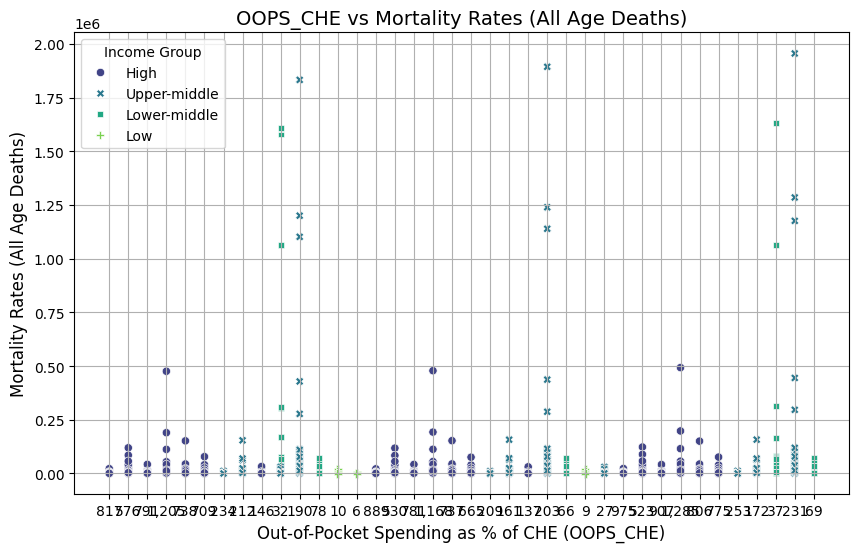

Correlation between OOPS_CHE and Mortality Rates: -0.07
Correlation between OOPS_CHE and Mortality Rates: -0.07
                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     7.903
Date:                Thu, 19 Dec 2024   Prob (F-statistic):            0.00499
Time:                        23:10:01   Log-Likelihood:                -22250.
No. Observations:                1680   AIC:                         4.450e+04
Df Residuals:                    1678   BIC:                         4.451e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

<ipython-input-3-b374e19dd2e2>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oops_mortality_df['oops_che'] = pd.to_numeric(oops_mortality_df['oops_che'], errors='coerce')
<ipython-input-3-b374e19dd2e2>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oops_mortality_df['Value'] = pd.to_numeric(oops_mortality_df['Value'], errors='coerce')


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import statsmodels.api as sm

# Load the dataset
data = pd.read_csv("merged_healthcare_data.csv")  # Replace with your file path

# Filter for relevant data
oops_mortality_df = data[(data['Metric'] == 'All Age Deaths') & (data['oops_che'].notnull())]

# Scatter plot: OOPS_CHE vs Mortality Rates
plt.figure(figsize=(10, 6))
sns.scatterplot(data=oops_mortality_df, x='oops_che', y='Value', hue='Income', style='Income', palette='viridis')
plt.title('OOPS_CHE vs Mortality Rates (All Age Deaths)', fontsize=14)
plt.xlabel('Out-of-Pocket Spending as % of CHE (OOPS_CHE)', fontsize=12)
plt.ylabel('Mortality Rates (All Age Deaths)', fontsize=12)
plt.legend(title='Income Group')
plt.grid(True)
plt.show()
# Convert 'oops_che' and 'Value' columns to numeric, coercing errors
oops_mortality_df['oops_che'] = pd.to_numeric(oops_mortality_df['oops_che'], errors='coerce')
oops_mortality_df['Value'] = pd.to_numeric(oops_mortality_df['Value'], errors='coerce')

# Drop rows with missing or invalid data
oops_mortality_df = oops_mortality_df.dropna(subset=['oops_che', 'Value'])

# Recalculate correlation after fixing data types
oops_corr, _ = pearsonr(oops_mortality_df['oops_che'], oops_mortality_df['Value'])
print(f"Correlation between OOPS_CHE and Mortality Rates: {oops_corr:.2f}")

# Correlation coefficient
oops_corr, _ = pearsonr(oops_mortality_df['oops_che'], oops_mortality_df['Value'])
print(f"Correlation between OOPS_CHE and Mortality Rates: {oops_corr:.2f}")

# Regression model: OOPS_CHE -> Mortality Rates
X = sm.add_constant(oops_mortality_df['oops_che'])  # Add constant for regression
y = oops_mortality_df['Value']
oops_model = sm.OLS(y, X).fit()

# Display regression summary
print(oops_model.summary())


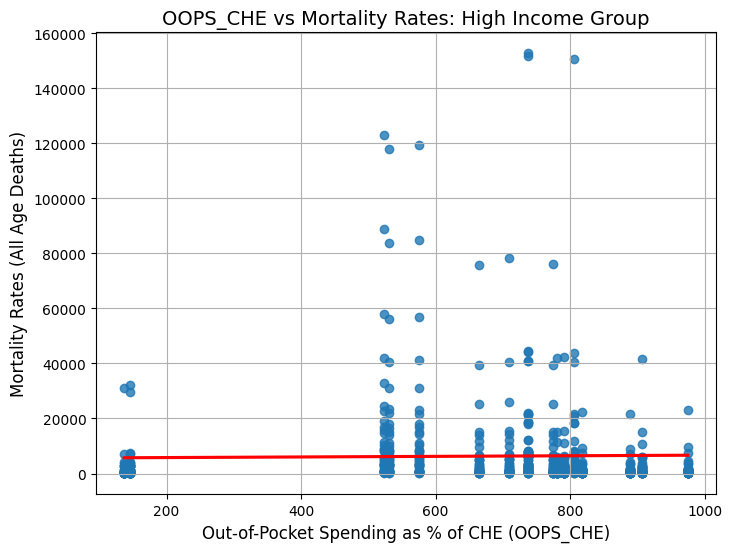

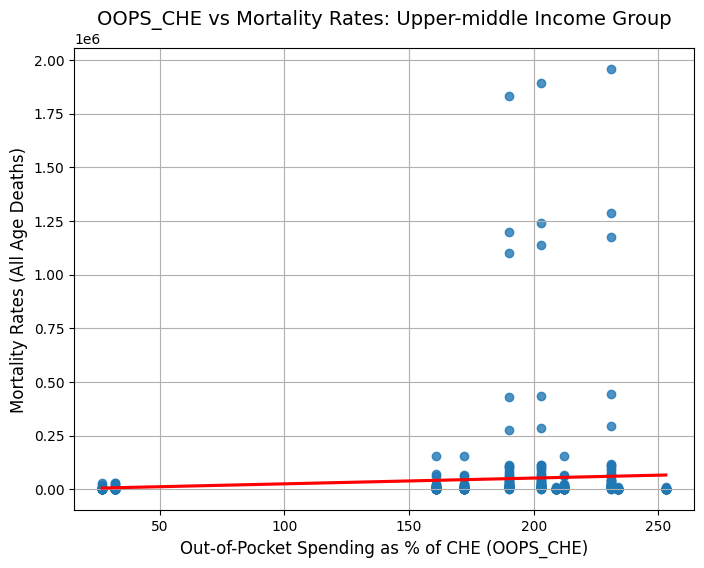

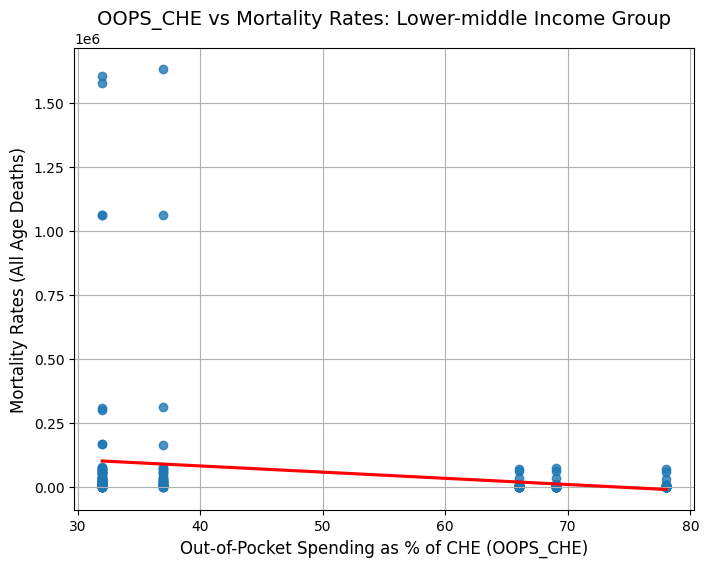

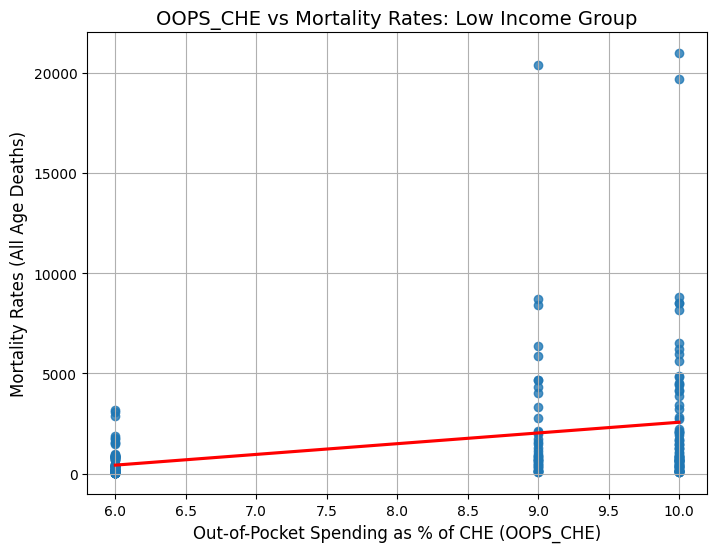


Income Group: High
Correlation: 0.02
                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2113
Date:                Thu, 19 Dec 2024   Prob (F-statistic):              0.646
Time:                        23:12:14   Log-Likelihood:                -8001.8
No. Observations:                 720   AIC:                         1.601e+04
Df Residuals:                     718   BIC:                         1.602e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       55

In [4]:
# Stratify the dataset by income groups
income_groups = oops_mortality_df['Income'].unique()
results_by_income = {}

# Loop through each income group
for group in income_groups:
    # Filter data for the income group
    group_data = oops_mortality_df[oops_mortality_df['Income'] == group]

    # Calculate correlation
    correlation, _ = pearsonr(group_data['oops_che'], group_data['Value'])

    # Fit regression model
    X = sm.add_constant(group_data['oops_che'])  # Add constant for regression
    y = group_data['Value']
    model = sm.OLS(y, X).fit()

    # Store results
    results_by_income[group] = {
        'correlation': correlation,
        'model_summary': model.summary()
    }

    # Visualize scatter plot with regression line
    plt.figure(figsize=(8, 6))
    sns.regplot(data=group_data, x='oops_che', y='Value', ci=None, line_kws={'color': 'red'})
    plt.title(f'OOPS_CHE vs Mortality Rates: {group} Income Group', fontsize=14)
    plt.xlabel('Out-of-Pocket Spending as % of CHE (OOPS_CHE)', fontsize=12)
    plt.ylabel('Mortality Rates (All Age Deaths)', fontsize=12)
    plt.grid(True)
    plt.show()

# Display results for each income group
for group, result in results_by_income.items():
    print(f"\nIncome Group: {group}")
    print(f"Correlation: {result['correlation']:.2f}")
    print(result['model_summary'])


In [22]:
import pandas as pd

# Load the original dataset
merged_healthcare_data_path = 'merged_healthcare_data.csv'
merged_healthcare_data = pd.read_csv(merged_healthcare_data_path)

# Step 1: Clean numeric columns
numeric_columns = ['Value', 'Out of Pocket Expense', 'oops_che']
for col in numeric_columns:
    merged_healthcare_data[col] = pd.to_numeric(merged_healthcare_data[col], errors='coerce')

# Step 2: Filter and aggregate mortality
all_age_deaths = merged_healthcare_data[merged_healthcare_data['Metric'] == 'All Age Deaths']
mortality_aggregated = all_age_deaths.groupby(['location_name', 'year', 'Income']).agg({
    'Value': 'mean'  # Average death count for chronic diseases
}).reset_index()
mortality_aggregated.rename(columns={'Value': 'Average Deaths'}, inplace=True)

# Step 3: Extract and clean static metrics
gdp_data = merged_healthcare_data[merged_healthcare_data['Metric'] == 'GDP per Capita'].drop_duplicates(
    subset=['location_name', 'year', 'Income'])
population_data = merged_healthcare_data[merged_healthcare_data['Metric'] == 'Total Population'].drop_duplicates(
    subset=['location_name', 'year', 'Income'])
che_data = merged_healthcare_data[merged_healthcare_data['Metric'] == 'CHE'].drop_duplicates(
    subset=['location_name', 'year', 'Income'])

# Step 4: Merge metrics with mortality
final_data = mortality_aggregated.merge(
    gdp_data[['location_name', 'year', 'Income', 'Value']].rename(columns={'Value': 'GDP per Capita'}),
    on=['location_name', 'year', 'Income'], how='left'
).merge(
    population_data[['location_name', 'year', 'Income', 'Value']].rename(columns={'Value': 'Total Population'}),
    on=['location_name', 'year', 'Income'], how='left'
).merge(
    che_data[['location_name', 'year', 'Income', 'Value']].rename(columns={'Value': 'CHE'}),
    on=['location_name', 'year', 'Income'], how='left'
).merge(
    merged_healthcare_data[['location_name', 'year', 'Income', 'Out of Pocket Expense', 'oops_che']].drop_duplicates(),
    on=['location_name', 'year', 'Income'], how='left'
)

# Step 5: Validate final dataset
print("Final Combined Dataset:")
print(final_data.head())


Final Combined Dataset:
  location_name  year        Income  Average Deaths  GDP per Capita  \
0     australia  2019          High       1827.4525    55049.571920   
1     australia  2020          High       1766.3450    51868.247557   
2     australia  2021          High       1884.6325    60697.245436   
3        brazil  2019  Upper-middle      13071.9400     8845.324149   
4        brazil  2020  Upper-middle      13393.6300     6923.699912   

   Total Population        CHE  Out of Pocket Expense  oops_che  
0        25334826.0        NaN                   14.7     817.0  
1        25649248.0  10.683737                   14.9     889.0  
2        25685412.0  10.543639                   13.8     975.0  
3       211782878.0        NaN                   24.9     212.0  
4       213196304.0  10.182350                   22.8     161.0  


In [28]:
import pandas as pd

# Load the original dataset
merged_healthcare_data_path = 'merged_healthcare_data.csv'
merged_healthcare_data = pd.read_csv(merged_healthcare_data_path)

# Step 1: Clean numeric columns
numeric_columns = ['Value', 'Out of Pocket Expense', 'oops_che']
for col in numeric_columns:
    merged_healthcare_data[col] = pd.to_numeric(merged_healthcare_data[col], errors='coerce')

# Step 2: Filter and aggregate mortality
all_age_deaths = merged_healthcare_data[merged_healthcare_data['Metric'] == 'All Age Deaths']
mortality_aggregated = all_age_deaths.groupby(['location_name', 'year', 'Income']).agg({
    'Value': 'mean'  # Average death count for chronic diseases
}).reset_index()
mortality_aggregated.rename(columns={'Value': 'Average Deaths'}, inplace=True)

# Step 3: Extract and clean static metrics
gdp_data = merged_healthcare_data[merged_healthcare_data['Metric'] == 'GDP per Capita'].drop_duplicates(
    subset=['location_name', 'year', 'Income'])
population_data = merged_healthcare_data[merged_healthcare_data['Metric'] == 'Total Population'].drop_duplicates(
    subset=['location_name', 'year', 'Income'])
che_data = merged_healthcare_data[merged_healthcare_data['Metric'] == 'CHE'].drop_duplicates(
    subset=['location_name', 'year', 'Income'])

# Step 4: Merge metrics with mortality
final_data = mortality_aggregated.merge(
    gdp_data[['location_name', 'year', 'Income', 'Value']].rename(columns={'Value': 'GDP per Capita'}),
    on=['location_name', 'year', 'Income'], how='left'
).merge(
    population_data[['location_name', 'year', 'Income', 'Value']].rename(columns={'Value': 'Total Population'}),
    on=['location_name', 'year', 'Income'], how='left'
).merge(
    che_data[['location_name', 'year', 'Income', 'Value']].rename(columns={'Value': 'CHE'}),
    on=['location_name', 'year', 'Income'], how='left'
).merge(
    merged_healthcare_data[['location_name', 'year', 'Income', 'Out of Pocket Expense', 'oops_che']].drop_duplicates(),
    on=['location_name', 'year', 'Income'], how='left'
)

# Step 5: Impute missing CHE values (if any)
# Calculate mean CHE by Income group
che_mean_per_income = che_data.groupby('Income')['Value'].mean()

# Impute missing CHE values
final_data['CHE'] = final_data.apply(
    lambda row: che_mean_per_income[row['Income']] if pd.isna(row['CHE']) else row['CHE'], axis=1
)

# Step 6: Validate final dataset
print("Final Combined Dataset (after fixing CHE):")
print(final_data.head())


Final Combined Dataset (after fixing CHE):
  location_name  year        Income  Average Deaths  GDP per Capita  \
0     australia  2019          High       1827.4525    55049.571920   
1     australia  2020          High       1766.3450    51868.247557   
2     australia  2021          High       1884.6325    60697.245436   
3        brazil  2019  Upper-middle      13071.9400     8845.324149   
4        brazil  2020  Upper-middle      13393.6300     6923.699912   

   Total Population        CHE  Out of Pocket Expense  oops_che  
0        25334826.0  11.950005                   14.7     817.0  
1        25649248.0  10.683737                   14.9     889.0  
2        25685412.0  10.543639                   13.8     975.0  
3       211782878.0   7.524585                   24.9     212.0  
4       213196304.0  10.182350                   22.8     161.0  


Multivariate Regression Results:
                            OLS Regression Results                            
Dep. Variable:         Average Deaths   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     227.5
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           2.57e-24
Time:                        03:09:22   Log-Likelihood:                -447.27
No. Observations:                  42   AIC:                             902.5
Df Residuals:                      38   BIC:                             909.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const  

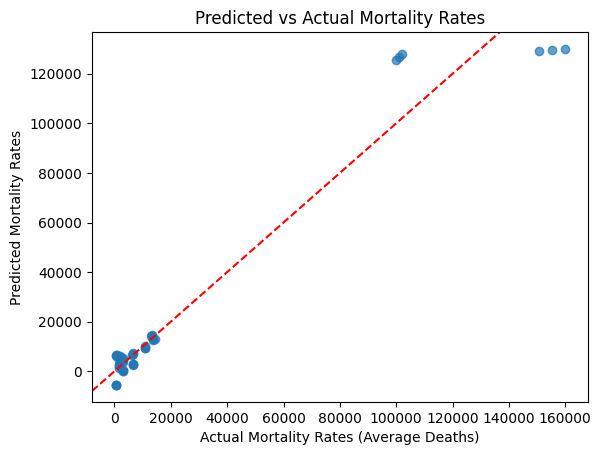

In [29]:
import pandas as pd
import statsmodels.api as sm

# Step 1: Prepare data for regression
regression_data = final_data[['Average Deaths', 'GDP per Capita', 'oops_che', 'Total Population']].dropna()

# Step 2: Define independent and dependent variables
X = regression_data[['GDP per Capita', 'oops_che', 'Total Population']]  # Independent variables
y = regression_data['Average Deaths']  # Dependent variable

# Add a constant for the regression model
X = sm.add_constant(X)

# Step 3: Fit the regression model
regression_model = sm.OLS(y, X).fit()

# Step 4: Display regression summary
print("Multivariate Regression Results:")
print(regression_model.summary())

# Step 5: Visualize predicted vs actual mortality
import matplotlib.pyplot as plt

# Predicted values
regression_data['Predicted Deaths'] = regression_model.predict(X)

# Scatterplot of predicted vs actual
plt.scatter(regression_data['Average Deaths'], regression_data['Predicted Deaths'], alpha=0.7)
plt.xlabel("Actual Mortality Rates (Average Deaths)")
plt.ylabel("Predicted Mortality Rates")
plt.title("Predicted vs Actual Mortality Rates")
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Line y=x
plt.show()


In [18]:
income_check = merged_healthcare_data[['location_name', 'Income']].drop_duplicates()
print(income_check)


      location_name        Income
0         australia          High
40            japan          High
80           canada          High
120   united states          High
160         germany          High
200  united kingdom          High
240          mexico  Upper-middle
280          brazil  Upper-middle
320    saudi arabia          High
360           india  Lower-middle
400           china  Upper-middle
440        viet nam  Lower-middle
480        ethiopia           Low
520          rwanda           Low
560    south africa  Upper-middle


In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF) for predictors:")
print(vif_data)


Variance Inflation Factor (VIF) for predictors:
            Feature        VIF
0             const   3.200427
1    GDP per Capita  19.506418
2          oops_che  18.906749
3  Total Population   1.155852


Revised Multivariate Regression Results (without OOPS_CHE):
                            OLS Regression Results                            
Dep. Variable:         Average Deaths   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     349.4
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           1.26e-25
Time:                        06:23:49   Log-Likelihood:                -447.32
No. Observations:                  42   AIC:                             900.6
Df Residuals:                      39   BIC:                             905.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

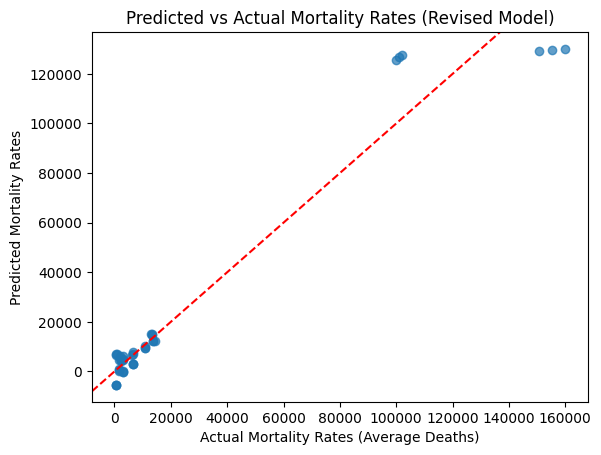

In [31]:
# Remove OOPS_CHE and refit the model
X_new = regression_data[['GDP per Capita', 'Total Population']]
X_new = sm.add_constant(X_new)  # Add constant
y = regression_data['Average Deaths']

# Refit the regression model
revised_model = sm.OLS(y, X_new).fit()

# Display updated regression results
print("Revised Multivariate Regression Results (without OOPS_CHE):")
print(revised_model.summary())

# Plot predicted vs actual mortality rates
regression_data['Predicted Deaths (Revised)'] = revised_model.predict(X_new)

plt.scatter(regression_data['Average Deaths'], regression_data['Predicted Deaths (Revised)'], alpha=0.7)
plt.xlabel("Actual Mortality Rates (Average Deaths)")
plt.ylabel("Predicted Mortality Rates")
plt.title("Predicted vs Actual Mortality Rates (Revised Model)")
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Line y=x
plt.show()


Log-Transformed Multivariate Regression Results:
                            OLS Regression Results                            
Dep. Variable:     Log Average Deaths   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     93.30
Date:                Fri, 20 Dec 2024   Prob (F-statistic):           1.37e-15
Time:                        06:41:17   Log-Likelihood:                -43.095
No. Observations:                  42   AIC:                             92.19
Df Residuals:                      39   BIC:                             97.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

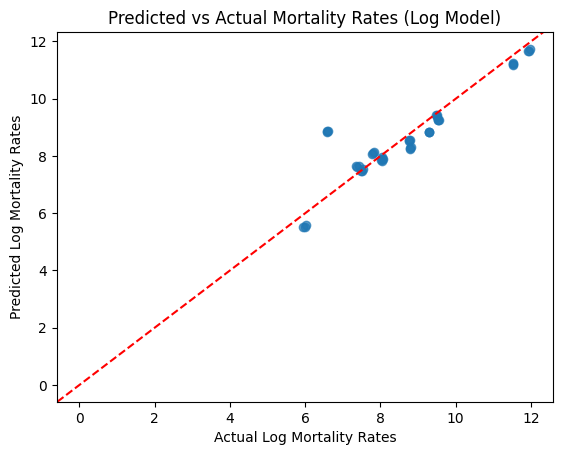

In [32]:
import numpy as np

# Apply log transformation to relevant variables
regression_data['Log GDP per Capita'] = np.log(regression_data['GDP per Capita'] + 1)
regression_data['Log Total Population'] = np.log(regression_data['Total Population'] + 1)
regression_data['Log Average Deaths'] = np.log(regression_data['Average Deaths'] + 1)

# Prepare new independent variables
X_log = regression_data[['Log GDP per Capita', 'Log Total Population']]
X_log = sm.add_constant(X_log)  # Add constant
y_log = regression_data['Log Average Deaths']

# Fit the regression model with log-transformed variables
log_model = sm.OLS(y_log, X_log).fit()

# Display regression results
print("Log-Transformed Multivariate Regression Results:")
print(log_model.summary())

# Plot predicted vs actual mortality rates (log scale)
regression_data['Predicted Log Deaths'] = log_model.predict(X_log)

plt.scatter(y_log, regression_data['Predicted Log Deaths'], alpha=0.7)
plt.xlabel("Actual Log Mortality Rates")
plt.ylabel("Predicted Log Mortality Rates")
plt.title("Predicted vs Actual Mortality Rates (Log Model)")
plt.axline((0, 0), slope=1, color='red', linestyle='--')  # Line y=x
plt.show()


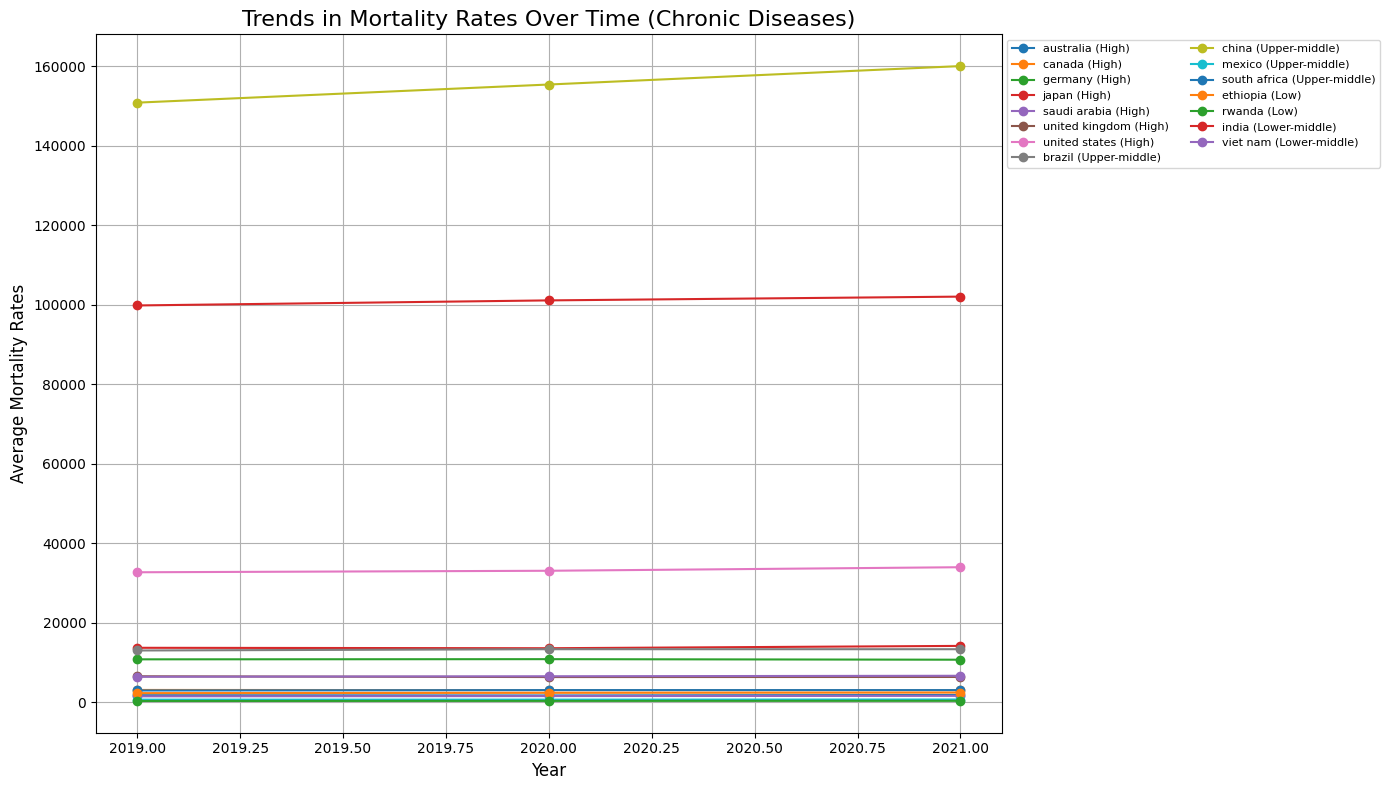

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Aggregate Mortality Data by Year, Country, and Income Group
# Group data by location_name, year, and income group, and calculate the average mortality rates
mortality_trends = final_data.groupby(['location_name', 'year', 'Income']).agg({
    'Average Deaths': 'mean'
}).reset_index()

# Step 2: Plot Trends in Mortality by Country and Income Group
plt.figure(figsize=(14, 8))

# Plot for each income group
for income_group in mortality_trends['Income'].unique():
    group_data = mortality_trends[mortality_trends['Income'] == income_group]

    # Plot trends for each country within the income group
    for country in group_data['location_name'].unique():
        country_data = group_data[group_data['location_name'] == country]
        plt.plot(
            country_data['year'],
            country_data['Average Deaths'],
            marker='o',
            label=f"{country} ({income_group})"
        )

# Customize the plot
plt.title("Trends in Mortality Rates Over Time (Chronic Diseases)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Mortality Rates", fontsize=12)
plt.legend(loc='upper left', fontsize=8, ncol=2, bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


Top 3 Countries with Highest Mortality Rates:
   location_name  Average Deaths        Income
0          china   155415.285833  Upper-middle
1          india   100998.144167  Lower-middle
2  united states    33289.923333          High


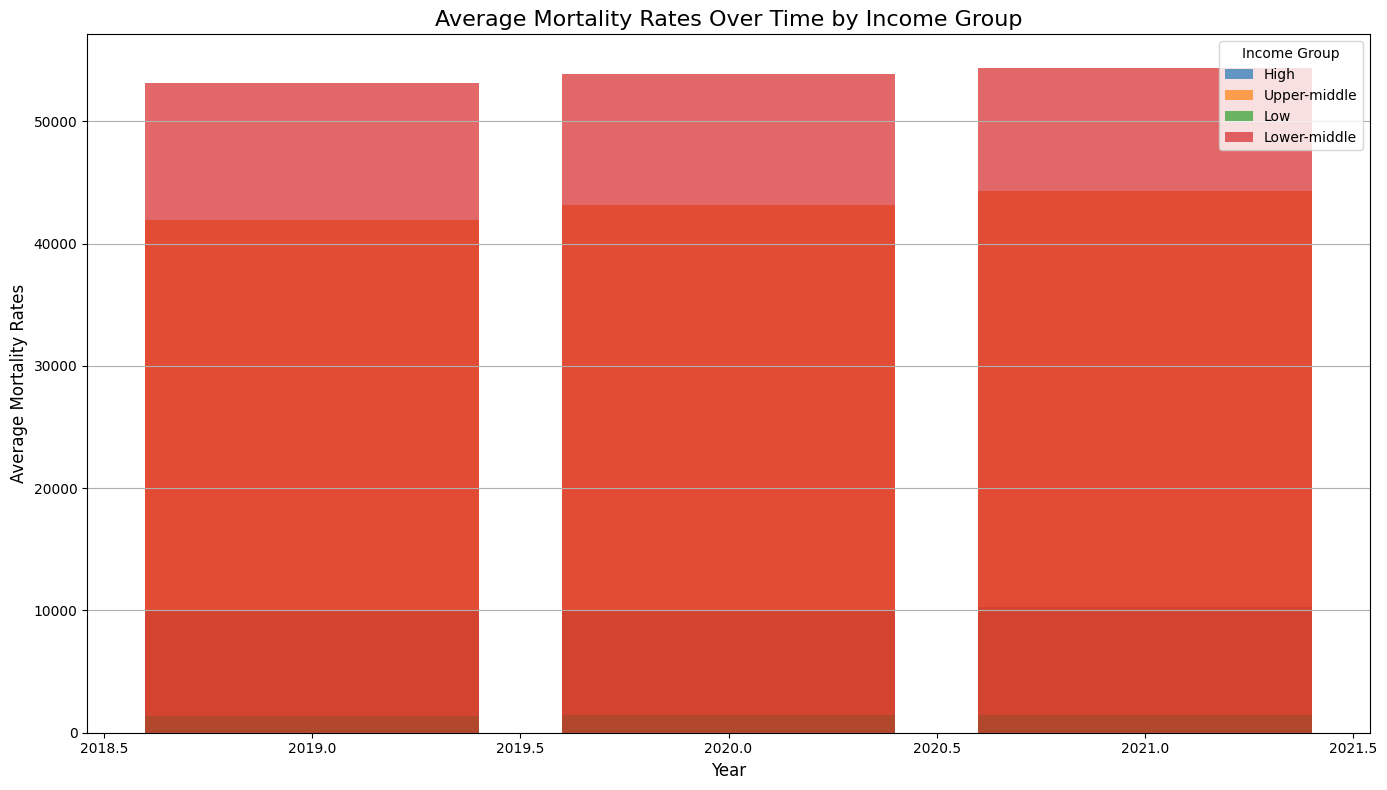

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Aggregate Mortality Data by Year, Country, and Income Group
# Group data by location_name, year, and income group, and calculate the average mortality rates
mortality_trends = final_data.groupby(['location_name', 'year', 'Income']).agg({
    'Average Deaths': 'mean'
}).reset_index()

# Step 2: Find Top 3 Countries with Highest Mortality Rates
top_countries = (
    mortality_trends.groupby('location_name')['Average Deaths']
    .mean()
    .sort_values(ascending=False)
    .head(3)
    .reset_index()
)
top_countries = top_countries.merge(
    mortality_trends[['location_name', 'Income']].drop_duplicates(), on='location_name'
)

print("Top 3 Countries with Highest Mortality Rates:")
print(top_countries)

# Step 3: Bar Graph for Mortality Trends
plt.figure(figsize=(14, 8))

# Plot mortality rates by year and income group as a bar chart
for income_group in mortality_trends['Income'].unique():
    group_data = mortality_trends[mortality_trends['Income'] == income_group]
    avg_mortality_by_year = group_data.groupby('year')['Average Deaths'].mean()

    plt.bar(
        avg_mortality_by_year.index,
        avg_mortality_by_year.values,
        label=f"{income_group}",
        alpha=0.7
    )

# Customize the bar graph
plt.title("Average Mortality Rates Over Time by Income Group", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Mortality Rates", fontsize=12)
plt.legend(title="Income Group", fontsize=10)
plt.grid(axis='y')
plt.tight_layout()

# Show the bar graph
plt.show()


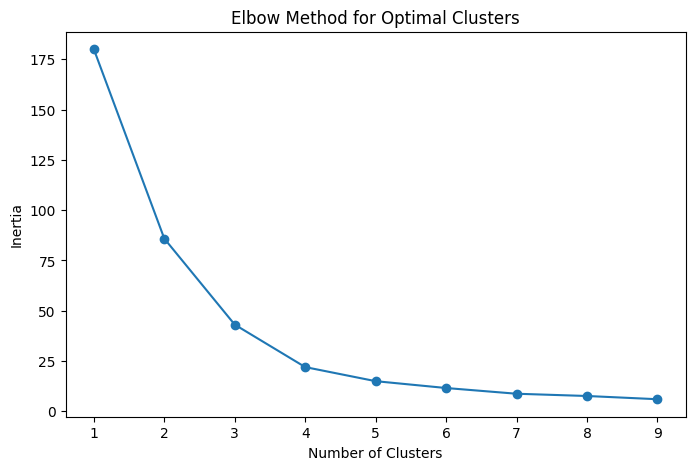

Cluster Summary:
   Cluster  Average Deaths  GDP per Capita  Out of Pocket Expense        CHE  \
0        0    11038.449211    48925.031601              13.078947  12.543971   
1        1     4136.959125     6671.209267              24.905000   6.470592   
2        2   128206.715000     6564.329881              42.616667   4.833385   

   Total Population  
0      1.077505e+08  
1      9.731271e+07  
2      1.403045e+09  


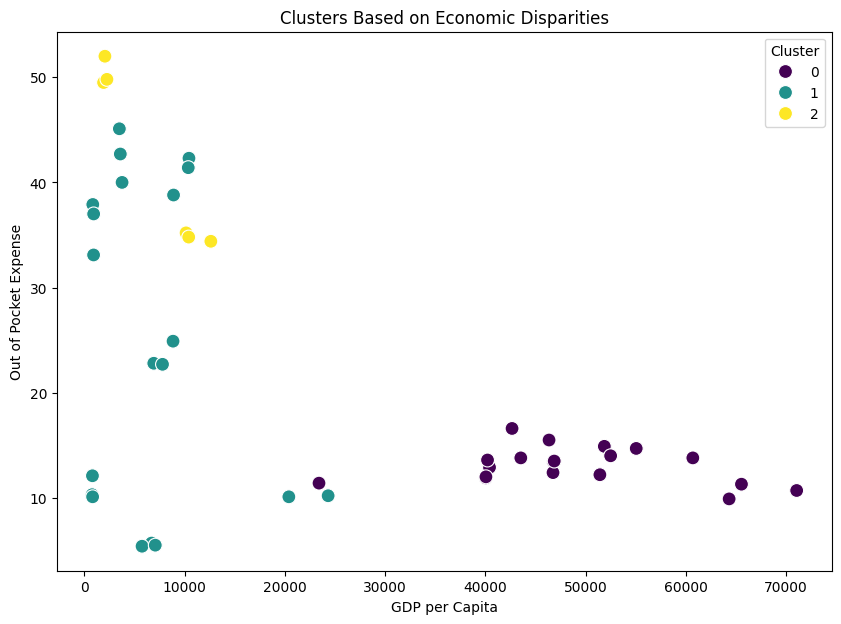

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Select features for clustering
features = final_data[['GDP per Capita', 'Out of Pocket Expense', 'CHE', 'Total Population']].dropna()

# Step 2: Normalize the data
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

# Step 3: Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Step 4: Apply K-Means with the optimal number of clusters
optimal_clusters = 3  # Based on the elbow method result
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(normalized_features)
features['Cluster'] = clusters

# Step 5: Add cluster labels to the original dataset
final_data['Cluster'] = clusters

# Step 6: Analyze clusters
cluster_summary = final_data.groupby('Cluster').agg({
    'Average Deaths': 'mean',
    'GDP per Capita': 'mean',
    'Out of Pocket Expense': 'mean',
    'CHE': 'mean',
    'Total Population': 'mean'
}).reset_index()

print("Cluster Summary:")
print(cluster_summary)

# Step 7: Visualize clusters in 2D space
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x=features['GDP per Capita'],
    y=features['Out of Pocket Expense'],
    hue=features['Cluster'],
    palette='viridis',
    s=100
)
plt.title('Clusters Based on Economic Disparities')
plt.xlabel('GDP per Capita')
plt.ylabel('Out of Pocket Expense')
plt.legend(title='Cluster')
plt.show()
